In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_moons

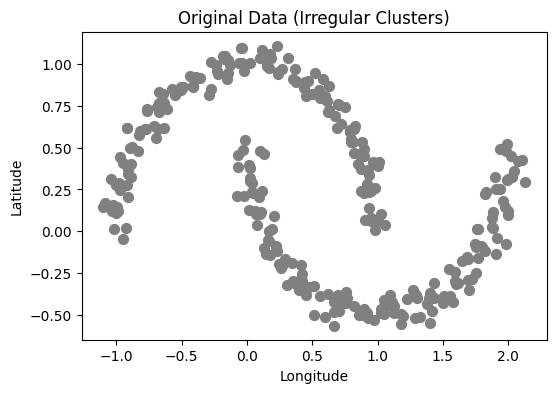

In [4]:
# -------------------------------
# 1. Generate synthetic "geospatial" data
# -------------------------------
# Using two interleaving moon-shaped clusters to simulate irregular spatial distribution
X, y_true = make_moons(n_samples=300, noise=0.05, random_state=42)

plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c='gray', s=50)
plt.title("Original Data (Irregular Clusters)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


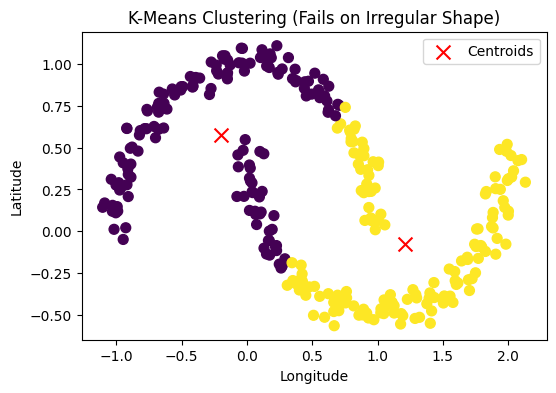

In [5]:
# -------------------------------
# 2. Apply K-Means (fails here)
# -------------------------------
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='x', s=100, label='Centroids')
plt.title("K-Means Clustering (Fails on Irregular Shape)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

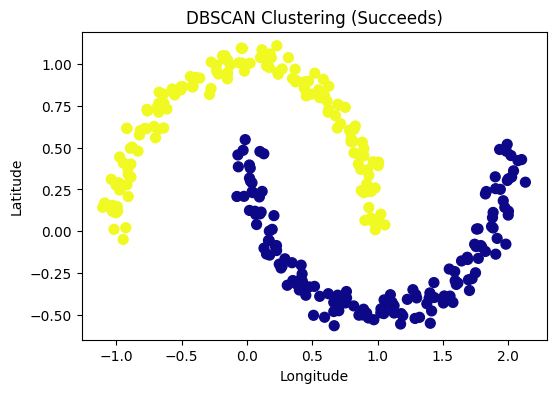

In [6]:
# -------------------------------
# 3. Apply DBSCAN (works)
# -------------------------------
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='plasma', s=50)
plt.title("DBSCAN Clustering (Succeeds)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

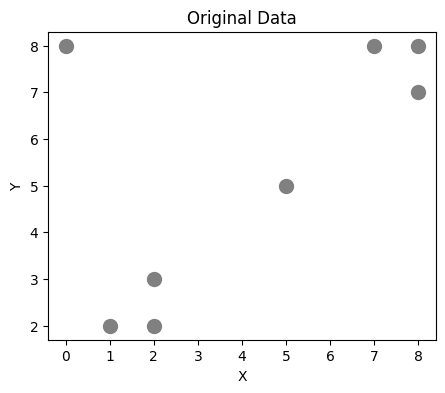

In [7]:
# -------------------------------
# 1. Create synthetic 2D dataset
# -------------------------------
X = np.array([
    [1, 2], [2, 2], [2, 3],       # Cluster 1
    [8, 7], [8, 8], [7, 8],       # Cluster 2
    [0, 8],                        # Noise
    [5, 5]                         # Noise
])

plt.figure(figsize=(5,4))
plt.scatter(X[:, 0], X[:, 1], c='gray', s=100)
plt.title("Original Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

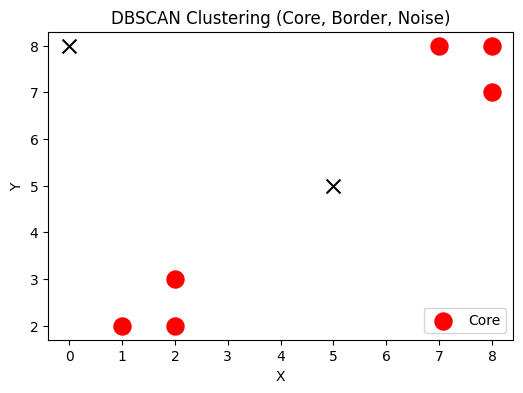

In [8]:
# -------------------------------
# 2. Apply DBSCAN
# -------------------------------
dbscan = DBSCAN(eps=1.5, min_samples=3)  # Radius=1.5, MinPts=3
labels = dbscan.fit_predict(X)

# -------------------------------
# 3. Identify core, border, and noise
# -------------------------------
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

plt.figure(figsize=(6,4))
for i, point in enumerate(X):
    if labels[i] == -1:
        plt.scatter(point[0], point[1], c='black', marker='x', s=100, label='Noise' if i==0 else "")
    elif core_samples_mask[i]:
        plt.scatter(point[0], point[1], c='red', s=150, label='Core' if i==0 else "")
    else:
        plt.scatter(point[0], point[1], c='blue', s=100, label='Border' if i==0 else "")

plt.title("DBSCAN Clustering (Core, Border, Noise)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()